In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [43]:
df = pd.read_csv("manhattan.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 16 columns):
rental_id           3539 non-null int64
rent                3539 non-null int64
bedrooms            3539 non-null float64
bathrooms           3539 non-null int64
size_sqft           3539 non-null int64
min_to_subway       3539 non-null int64
floor               3539 non-null float64
building_age_yrs    3539 non-null int64
no_fee              3539 non-null int64
has_roofdeck        3539 non-null int64
has_washer_dryer    3539 non-null int64
has_doorman         3539 non-null int64
has_elevator        3539 non-null int64
has_dishwasher      3539 non-null int64
has_patio           3539 non-null int64
has_gym             3539 non-null int64
dtypes: float64(2), int64(14)
memory usage: 442.5 KB


In [44]:
print(df.corr())

                  rental_id      rent  bedrooms  bathrooms  size_sqft  \
rental_id          1.000000 -0.134347 -0.070290  -0.109414  -0.107711   
rent              -0.134347  1.000000  0.638336   0.769474   0.857954   
bedrooms          -0.070290  0.638336  1.000000   0.720885   0.771263   
bathrooms         -0.109414  0.769474  0.720885   1.000000   0.803627   
size_sqft         -0.107711  0.857954  0.771263   0.803627   1.000000   
min_to_subway      0.009615  0.035164  0.076543   0.086932   0.039448   
floor             -0.082586  0.215867  0.043539   0.127969   0.107186   
building_age_yrs   0.028543 -0.128895  0.037228  -0.095421   0.014489   
no_fee             0.064919 -0.101497 -0.100352  -0.062205  -0.141451   
has_roofdeck      -0.023335  0.035165  0.002938   0.019556   0.024822   
has_washer_dryer  -0.072738  0.053873  0.008721   0.025752   0.038263   
has_doorman       -0.057786  0.031302 -0.017331   0.014745   0.026098   
has_elevator      -0.060152  0.051860 -0.006771   0

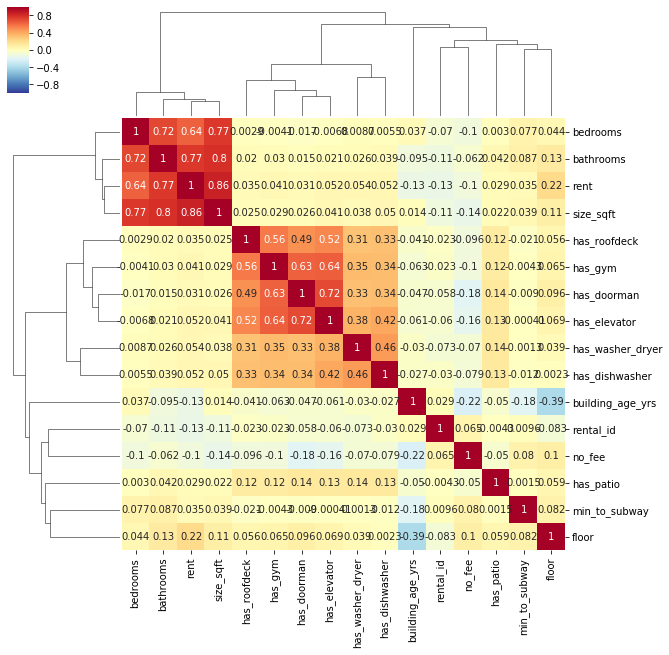

In [36]:
sns.clustermap(df.corr(), 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [37]:
x = df[['bedrooms', 'bathrooms', 'size_sqft']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size=0.2)

In [38]:
from sklearn.linear_model import LinearRegression

LRmodel = LinearRegression()
LRmodel.fit(x_train, y_train)

y_predict = LRmodel.predict(x_test)

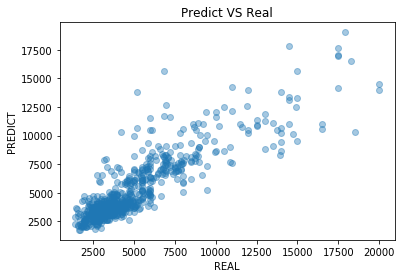

In [39]:
plt.scatter(y_test,y_predict, alpha=0.4)
plt.xlabel("REAL")
plt.ylabel("PREDICT")
plt.title("Predict VS Real")
plt.show()

In [40]:
print(LRmodel.coef_)
print(LRmodel.intercept_)

[[-365.34413897 1340.1580966     4.96686387]]
[-827.59940247]


In [41]:
print(LRmodel.score(x_train,y_train))

0.7600178978370339
